In [20]:
# Initialize Otter
import otter
grader = otter.Notebook("ps2.ipynb")

# Econ 140 – Problem Set 2

In this problem set we will be conducting a variety of single-variable linear regressions. 
There are many ways to do linear regressions in Python; we will be using a package called `statsmodels` (which we import as `sm`) and its `OLS` class.
[Here](https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html) is the documentation; you may find the examples especially helpful if you are stuck.
We'll go through an example of how to use `sm.OLS` below.

Suppose we have a dataset called `df` that has two columns of observations, one called `wage` and the other `educ`, and suppose we want to regress `wage` onto `educ` and a constant.
To do so, we would first identify the endogenous (dependent) variable and the exogenous (independent) variables.

```python
y = df['wage']
X = df['educ']
```

To add an intercept term into our model, we must add a column of 1's to our independent variable using `sm.add_constant`. This will return a two column table, with 1 column only having the value 1.

```python
X = sm.add_constant(df['educ'])
```

Next, we will pass in our endogenous and exogenous variables (in that order) to `sm.OLS`, which will create an OLS model. Make sure to store the model!


```python
my_ols_model = sm.OLS(y, X)
```

So far, we have initialized our model but have not actually fitted it. To do so, we run the `fit` command on our model and store it. 
In order to incorporate robust standard errors, we also have to pass in the argument `cov_type = 'HC1'`. 

```python
results = my_ols_model.fit(cov_type = 'HC1')
```

Lastly, displaying our fitted results `results` should display the results. You display by running the code `results.summary()` at the end of your cell.
In the middle table of our results, you should see something like this.
![](statsmodels_example.jpeg)

Before getting started on the assignment, run the cell at the very top that imports `otter` and the cell below which will import the packages we need.

**Important:** As mentioned in problem set 0, if you leave this notebook alone for a while and come back, to save memory datahub will "forget" which code cells you have run, and you may need to restart your kernel and run all of the cells from the top. That includes this code cell that imports packages. If you get `<something> not defined` errors, this is because you didn't run an earlier code cell that you needed to run. It might be this cell or the `otter` cell above.

In [21]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy import stats

## Problem 1. Bivariate Linear Regression

In this question we create a synthetic dataset using random number generation commands. This time we create two random variables that are related to one another, and we fit that relationship using a bivariate linear regression. The beauty of this approach is that we know the population parameters because we pick them when generating the data. We can then check to see how well least squares estimation performs.

<!-- BEGIN QUESTION -->

**Question 1.a.**
Begin by specifying that there are 100 observations and generate the regressor to be $x = 10 + 20v$, where $v$ is a uniform random variable on the unit interval. 
As a result, $x$ is a random variable uniformly distributed on the interval $[10, 30]$. 
Next specify the dependent variable to be linearly related to this regressor according to $y = 30 + 5x + u$, where $u$ is a random draw from a normal distribution with population mean 0 and population standard deviation 100. 
Then, generate a scatter plot of $x$ and $y$.

*Hint*: You may want to check out [`np.random.random_sample`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.random_sample.html) to generate $v$. 
You also may want to check out [`np.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) to generate $u$.

<!--
BEGIN QUESTION
name: q1_a
manual: true
-->

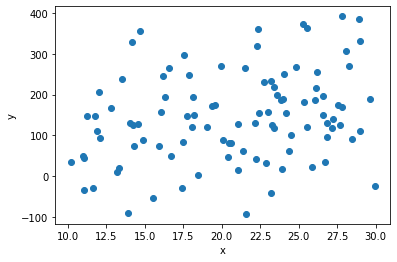

In [22]:
v = np.random.random_sample(100)
x = 10 + 20 * v
u = np.random.normal(0, 100, 100)
y = 30 + 5*x + u

plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y");

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 1.b.**
Next regress $y$ on $x$ (calling for robust standard errors). Is each one of the three OLSE assumptions satisfied in this case? Explain why for each one. Give your assessment of how well least squares regression performs in estimating the true intercept and slope.

This question is for your code, the next is for your explanation.

<!--
BEGIN QUESTION
name: q1_b
manual: true
-->

In [23]:
X_1b = sm.add_constant(x)
model_1b = sm.OLS(y, X_1b)
results_1b = model_1b.fit(cov_type = 'HC1')
results_1b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     8.111
Date:                Fri, 08 Oct 2021   Prob (F-statistic):            0.00536
Time:                        19:05:14   Log-Likelihood:                -607.34
No. Observations:                 100   AIC:                             1219.
Df Residuals:                      98   BIC:                             1224.
Df Model:                           1                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.7221     40.730      0.754      0.451     -49.107     110.551
x1             5.5214      1.939      2.848      0.004       1.722       9.321
==============================================================================
Omnibus:                        0.790   Durbin-Watson:                   1.859
Prob(Omnibus):                  0.674   Jarque-Bera (JB):                0.912
Skew:                           0.165   Prob(JB):                        0.634
Kurtosis:                       2.668   Cond. No.                         83.8
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 1.c.**
Explain.

<!--
BEGIN QUESTION
name: q1_c
manual: true
-->

Assumption 1: Conditional mean zero errors 
We can assume this to be true because x was created from a random varible indepent of the error term u. Also u was given a mean of 0 with a normal distribution so E(u) = 0, independent of x.  
Assumption 2: Random sampling  
Our random variable x was created from a uniform random variable sampling function so x was randomly sampled, and since each value of y was created from a linear function of x we can assum each x_i and y_i were randomly sampled.  
Assumption 3: Outliers are unlikely  
Since the values were created from a unform distribution and a normal distribution, outliers are very unlikely.

<!-- END QUESTION -->



Below we have printed out for you the square root of the mean squared error of the residuals. This is another term for the standard error of the regression.

In [24]:
results_1b.mse_resid ** 0.5

106.11603140851325

<!-- BEGIN QUESTION -->

**Question 1.d.**
Looking at the results of this regression including the number shown above, assess how close least squares estimation is to the true variance of the error term.

<!--
BEGIN QUESTION
name: q1_d
manual: true
-->

Since the true variance we created with u is 100, the least squares estimation does a good job of estimating the standard deviation of the error terms.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 1.e.**
Generate the regression residuals and confirm they add up to zero. Also, confirm that the residuals are uncorrelated with the regressor.

*Hint: The command `results_1c.resid` will give you an array of the residuals of the regression. The function `np.sum()` takes an array as an argument inside the parenthases and sums all of the elements together. Remember that `results_1c.resid` is an array. Also, the function `np.corrcoef()` takes in two arrays of equal length, separated by a comma, and computes the correlation matrix of the two arrays. For example, usage might look like `np.corrcoef(array1, array2)`.*

<!--
BEGIN QUESTION
name: q1_e
manual: true
-->

In [25]:
sum_of_residuals = np.sum(results_1b.resid)
print("Sum of residuals: ", sum_of_residuals)
np.corrcoef(results_1b.resid, x)

Sum of residuals:  1.0800249583553523e-12


array([[1.00000000e+00, 8.79695308e-17],
       [8.79695308e-17, 1.00000000e+00]])

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 1.f.**
Now generate the variables $x$ and $y$ as you did above but do it for $n = 1000$ observations. Run the regression of $y$ on $x$ and compare the results with the earlier case of $n = 100$. Explain the differences.

This question is for your code, the next is for your explanation.

<!--
BEGIN QUESTION
name: q1_f
manual: true
-->

In [26]:
v_1000 = np.random.sample(1000)
x_1000 = 10 + 20 * v_1000
u_1000 = np.random.normal(0, 100, 1000)
y_1000 = 30 + 5 * x_1000 + u_1000

X_1f = sm.add_constant(x_1000)
model_1f = sm.OLS(y_1000, X_1f)
results_1f = model_1f.fit(cov_type = 'HC1')
results_1f.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     81.75
Date:                Fri, 08 Oct 2021   Prob (F-statistic):           7.84e-19
Time:                        19:05:14   Log-Likelihood:                -6023.6
No. Observations:                1000   AIC:                         1.205e+04
Df Residuals:                     998   BIC:                         1.206e+04
Df Model:                           1                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.7282     11.716      2.623      0.009       7.766      53.691
x1             4.9513      0.548      9.042      0.000       3.878       6.025
==============================================================================
Omnibus:                        0.129   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.937   Jarque-Bera (JB):                0.129
Skew:                          -0.027   Prob(JB):                        0.938
Kurtosis:                       2.990   Cond. No.                         75.1
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 1.h.**
Explain.

<!--
BEGIN QUESTION
name: q1_h
manual: true
-->

The standared errors of both beta_1_hat and beta_0_hat for n = 1,000 are smaller than the regression statistics for n = 100. Also the values of beta_1_hat and beta_0_hat for n = 1,000 are closer to the true population parameters than the statistics for n = 100. 

<!-- END QUESTION -->



---

## Problem 2. Wages and Education

For this problem we will use the dataset `wages.csv`. This dataset contains information on about 300 American workers. It includes their average monthly wage (`wage`), gender (`male`) and completed years of formal education (`educ`). You suspect (hope?) that people with higher educational attainment earn more on average.

In [27]:
wages = pd.read_csv("wages.csv")
wages.head()

,male,wage,educ
0,1.0,3284.2330,12.0
1,1.0,2994.7632,12.0
2,0.0,2078.7065,9.0
3,0.0,1679.6749,5.0
4,1.0,2633.8242,6.0


<!-- BEGIN QUESTION -->

**Question 2.a.**
Plot a scatter diagram of the average monthly wage against education level. Does it confirm your intuition? What differences do you see between individuals who did not complete high school and those that did?

This question is for your code, the next is for your explanation.

<!--
BEGIN QUESTION
name: q2_a
manual: true
-->

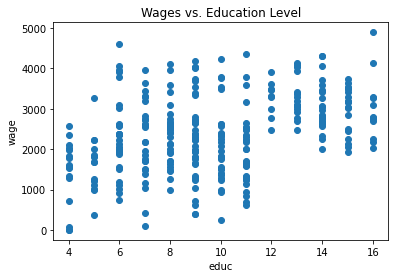

In [28]:
plt.scatter(wages['educ'], wages['wage'])
plt.xlabel("educ")
plt.ylabel("wage")
plt.title("Wages vs. Education Level");

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 2.b.**
Explain.

<!--
BEGIN QUESTION
name: q2_b
manual: true
-->

Yes I see an overall trend in the data that the values of wage go up as education level increases. Also I see major differnces between educ = 11 and educ = 12, the years before and after high school is completed. At educ = 12, the mean wage is higher and also the variation in wages is less spread out after completing high school. A high wage job is more assured. 

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 2.c.**
Perform an OLS regression of wages on education. Be sure to include the robust option. Give a precise interpretation of least squares estimate of the intercept and evaluate its sign, size and statistical significance. Does its value make economic sense? Do the same for the least squares estimate of the slope. Does this slope estimate confirm the scatter plot above?

This question is for your code, the next is for your explanation.

<!--
BEGIN QUESTION
name: q2_c
manual: true
-->

In [29]:
y_2c = wages['wage']
X_2c = sm.add_constant(wages['educ'])
model_2c = sm.OLS(y_2c, X_2c)
results_2c = model_2c.fit(cov_type = 'HC1')
results_2c.summary()

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.160
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     70.91
Date:                Fri, 08 Oct 2021   Prob (F-statistic):           1.60e-15
Time:                        19:05:14   Log-Likelihood:                -2460.4
No. Observations:                 300   AIC:                             4925.
Df Residuals:                     298   BIC:                             4932.
Df Model:                           1                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1256.1721    151.039      8.317      0.000     960.141    1552.203
educ         117.1024     13.907      8.421      0.000      89.846     144.359
==============================================================================
Omnibus:                        1.218   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.544   Jarque-Bera (JB):                1.258
Skew:                           0.152   Prob(JB):                        0.533
Kurtosis:                       2.909   Cond. No.                         31.7
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 2.d.**
Explain.

<!--
BEGIN QUESTION
name: q2_d
manual: true
-->

$$ \widehat{wage} = 117 * educ + 1256 $$

The intercept's value is 1256, and it's statistically significant at the 5% level because its p-value around 0. The value of this intercept means that if somebody had no education they would be predicted to make a monthly wage of 1,256 dollars. This value does make economic sense because there are federal laws in place that require as minimum wage for employees regardless of their credentials.

The slope's value is 117, and it's statistically significant at the 5% level because the calculated p-value is very close to 0 as shown by the results summary. This value can be interpreted as if you go to school for one more year, there is a predicted increase in your monthly wage by 117 dollars. This value makes economic sense because we expect that as your education level increases there are more high-skill available jobs that generally have a higher-paying wage.

This slope estimate does confirm the scatter plot above because there is a observed general trend for wages to increase as the education level increases. 

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 2.e.**
List the three OLS assumptions and give a concrete example of when each of those would hold in this context. Are these assumptions plausible in this context?

<!--
BEGIN QUESTION
name: q2_e
manual: true
-->

Assumption 1: $Conditional\ Mean\ Zero\ Errors$  
This assumption holds when the error term in the population regression model has no corelation between education level, this is when wage can be purely explained by education. However this assumption is not plausible in this context since there are many variables besides education level that affect wage, such as the school you graduate from and family connections.
  
Assumption 2: $Random\ Sampling$  
This assumption would hold if the 300 person sample was randomly sampled from the entire population of American workers. We can assume in this context that the sampling was done from a very large population where it's very close and behaves in a similar fashion to sampling from the whole population of workers.
  
Assumption 3: $Outliers\ are\ Unlikely$  
This assumption would hold if there were some wages that weren't multiple standard deviations above the rest and there was a set baseline for the lowest wage. We can assume in this context this assumption holds since the minimum wage bars low outliers in wage and one person with the same education as others is unlikely to make multiple SDs more money than the rest of their peers.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 2.f.**
You are rightfully concerned whether education will, in fact, be rewarded in the labor market. You wonder if another year of education will yield an expected \\$100 more per month (which if discounted over a typical working lifetime at say, 5\%, amounts to roughly a year at Berkeley). Test the following null hypothesis:
$H_0: \beta_1 = 100$ vs $H_1: \beta_1 \neq 100$.

<!--
BEGIN QUESTION
name: q2_f
manual: true
-->

For a test at the 5% significance we can use a 95% confidence interval to test our null hypothesis if the true slope is equal to 100. With a 95% confidence interval of (89, 144) we fail to reject the null hypothesis. Since 100 is contained in that slope, 100 is a plausible value for the true slope at the 5% significance level.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 2.g.**
Let’s now return to a familiar empirical question: do men and women earn the same amount? As in part (a) above, generate a scatterplot of `wage` against the dummy variable `male`. Don't forget to label your axes! What is your answer to the question based on this graph?

This question is for your code, the next is for your explanation.

<!--
BEGIN QUESTION
name: q2_g
manual: true
-->

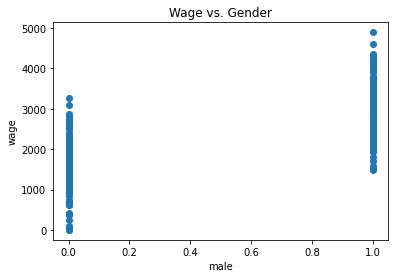

In [30]:
plt.scatter(wages['male'], wages['wage'])
plt.xlabel('male')
plt.ylabel('wage')
plt.title('Wage vs. Gender');

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 2.h.**
Explain.

<!--
BEGIN QUESTION
name: q2_h
manual: true
-->

Based on the data men and women, on average, do not make the same amount of money.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 2.i.**
Run an OLS regression of `wage` on `male`. Provide a precise interpretation of the slope. Do you believe you have found evidence of wage discrimination in this data, or do you believe there is another explanation for the differences? Explain.

This question is for your code, the next is for your explanation.

<!--
BEGIN QUESTION
name: q2_i
manual: true
-->

In [31]:
y_2i = wages['wage']
X_2i = sm.add_constant(wages['male'])
model_2i = sm.OLS(y_2i, X_2i)
results_2i = model_2i.fit(cov_type = 'HC1')
results_2i.summary()

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     308.3
Date:                Fri, 08 Oct 2021   Prob (F-statistic):           6.98e-48
Time:                        19:05:14   Log-Likelihood:                -2381.1
No. Observations:                 300   AIC:                             4766.
Df Residuals:                     298   BIC:                             4774.
Df Model:                           1                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1616.2270     56.841     28.434      0.000    1504.820    1727.634
male        1376.8925     78.413     17.559      0.000    1223.206    1530.579
==============================================================================
Omnibus:                        1.693   Durbin-Watson:                   2.230
Prob(Omnibus):                  0.429   Jarque-Bera (JB):                1.484
Skew:                           0.014   Prob(JB):                        0.476
Kurtosis:                       2.657   Cond. No.                         2.77
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 2.j.**
Explain.

<!--
BEGIN QUESTION
name: q2_j
manual: true
-->

The slope value of 1376 is the difference in sample means between the average wage of men minus average wage of women in the sample. This positive difference means that men have a higher average wage compared to women by 1,376 dollars. One possible explanation for this difference besides wage discrimination is that men get more managerial positions in companies which lead them to have higher paying jobs. More regression models will have to be made accounting for type of job as well in the future, to lead to a causal inference of wage discrimination.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 2.k.**
As we did in problem set 1, perform a t-test of a difference in wages between men and women and report the t-stat and p-value. Compare the output of that test with the regression results you got using the male dummy. To make the two results (in terms of t-stat and p-value) correspond, do you assume equal or unequal variance of men’s and women’s wages?

This question is for your code, the next is for your explanation.

<!--
BEGIN QUESTION
name: q2_k
manual: true
-->

In [32]:
wages_men = wages[wages['male'] == 1]
wages_women = wages[wages['male'] == 0]

ttest_2k = stats.ttest_ind(wages_men['wage'], wages_women['wage'], equal_var = False)

tstat_2k = ttest_2k.statistic
pval_2k = ttest_2k.pvalue

print("t-stat: {}".format(tstat_2k))
print("p-value: {}".format(pval_2k))

t-stat: 17.558368459097736
p-value: 1.6265962860910122e-47


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 2.l.**
Explain.

<!--
BEGIN QUESTION
name: q2_l
manual: true
-->

To make the t-test and regression results correspond, I assumed unequal variance for the t-test since heterosckedasticity (unequal variances) was tested for in the regression.  
The null hypothesis is that the distribution of values between the wages of men and women are the same. Using a 1% significance level on the t-test we can reject the null hypothesis since the p-value (1.62e-47) is less than 0.01 and the absolute value of the t-value (17) is greater than 2.58. The data favors the hypothesis that the distribution between men and women's wages are different. This conclusion from the t-test is similar to the conclusion we get from the regression results where the p-value for the statistical significance of Beta_1 = 0, is 0. We use the test for Beta_1 since as we said this value is the difference in the means between the samples for men's wages and women's wages.

<!-- END QUESTION -->



---

## Problem 3. Wine Prices and Vintage

Suppose you are interested in the relationship between the price of wine bottles and their vintage (a vintage wine is a wine which is made up of grapes harvested in a specific year) and you write the following model: $price_i = \beta_0 + \beta_1 vintage_i + u_i$, where price is expressed in dollars, vintage in years (i.e., 1 if the grapes were harvested one year ago, 2 if the grapes were harvested two years ago, etc.), $u_i$ are the error terms, and $i$ indexes the bottles. Assume a very large sample size (like tens of thousands of bottles).

<!-- BEGIN QUESTION -->

**Question 3.a.**
What is contained in the error term? Provide a couple of examples. Do you think that the first OLS assumption is plausible in this context?

<!--
BEGIN QUESTION
name: q3_a
manual: true
-->

The error term contains all the other possible factors that could affect the price of wine bottles. Some of these factors could be the type of grapes harvested, the name of the wine distillery, and the soil being used to make the grapes. The first OLS assumption that the vintage is uncorrelated with all these other possible factors is not plausible in this context. These other factors could lead to more grapes being harvested in certain years than other, affecting the date of the bottle, and hence being correlated.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 3.b.**
Suppose you estimate your model via OLS and you obtain the following estimated coefficients (standard errors are reported in parenthesis), with $R^2 = 0.77$:
$$price_i = \underset{(2.57)}{1.75} + \underset{(1.02)}{5.5} vintage_i + \hat{u}_i$$

Interpret the regression coefficients.

<!--
BEGIN QUESTION
name: q3_b
manual: true
-->

For the intercept term - if the grapes were just harvested then the predicted price for this bottle is 1.75 dollars.  
For the slope term - with every year the age of the harvested grapes increase, the price of the bottle is predicted to increase by 5.5 dollars per year.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 3.c.**
Comment on the $R^2$. Given this statistic what can you infer about causality in the relationship of prices and vintage?

<!--
BEGIN QUESTION
name: q3_c
manual: true
-->

Among all variation, 77% of the price is explained by the vintage of the wine bottle in this model. Even with a large R-squared you still cannot infer causality in the relationship of prices and vintages from this value.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 3.d.**
Predict the fitted value of price of a bottle whose grapes were harvested ten years ago, and that for a bottle harvested nine years ago; then compute the difference between the two values.

<!--
BEGIN QUESTION
name: q3_d
manual: true
-->

10 year bottle fitted price = 1.75 + 5.5 * (10) = 56.75  
9 year bottle fitted price = 1.75 + 5.5 * (9) = 51.25  
Difference = 56.75 - 51.25 = 5.5

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 3.e.**
Derive the marginal effect of the increase in one year in vintage on price. Do you get the same result as in part (d)? Why? Explain.

<!--
BEGIN QUESTION
name: q3_e
manual: true
-->

The marginal effect can be derived from the regression model, the marginal effect is equal to Beta_1_hat which for this model is 5.5 dollars. This value is the same as the value in 3.d. because we calculated the difference in price for two bottles with a 1 year vintage difference. This one year difference is defined as the same value as marginal effect.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 3.f.**
Using the results above, give a 95\% confidence interval for the difference in average price for a ten year bottle vs a five year bottle. Can you reject the null hypothesis that this difference is \\$40?

<!--
BEGIN QUESTION
name: q3_f
manual: true
-->

$$ 95\ Percent\ Confidence\ Interval\ = ((5.5 * 5) \pm 1.02 * 1.96) = (25.5, 29.5)$$

Base on this confidence interval we can reject the null hypothesis that the difference is 40 dollars at the 5% significance level, since 40 is not a value contained within the interval.

<!-- END QUESTION -->



---

## Problem 4. Family Size and Consumption

The 2015 Nobel Prize winner, Prof. Angus Deaton of Princeton, spent a lifetime studying the consumption behavior of individuals and households, in contrast to the earlier tradition of modeling aggregate consumption. You will follow in his footsteps in this problem by examining the role of family size on consumption patterns. In particular, you will examine how food expenditures are related to the size of the household. It is hypothesized that as family size increases (e.g. people move in together), economies of scale are realized. We might expect per capita food consumption to increase with increases in household size. Especially in poor households, where food expenditures are at bare minimum, we would expect per capita food consumption to rise with household size. To do your research, you will work with a selection from the U.S. Consumer Expenditure Survey for 1,000 U.S. households from 2014 `ces.csv`. A few of the key variables from the data file are described in the table below.

| Variable     | Description                                                   |
|--------------|---------------------------------------------------------------|
| age_ref      | age of reference person                                       |
| fam_size     | number of members in household                                |
| no_earnr     | number of earners                                             |
| totexppq     | total expenditures during previous quarter                    |
| foodpq       | total food expenditures during previous quarter               |
| fractearners | fraction of adults in household who work                      |
| ratioover64  | number of family members older than 64 to total family size   |
| ratioless18  | number of family members younger than 18 to total family size |
| rationless2  | number of family members younger than 2 to total family size  |

In [33]:
ces = pd.read_csv("ces.csv")
ces.head()

,newid,age_ref,fam_size,no_earnr,region,totexppq,foodpq,hh_cu_q,fractearners,ratioover64,...,northe,midw,west,raceb,racea,racena,racepi,racew,jfs_amt,r
0,2812745,29,3,0,2.0,3863.6667,476.6667,1,0.000000,0.0,...,0.0,1.0,0.0,0,0,0,0,1,0,0.000011
1,2802255,18,1,1,1.0,1364.8333,173.3333,1,1.000000,0.0,...,1.0,0.0,0.0,1,0,0,0,0,0,0.000037
2,2670405,35,3,1,4.0,3791.9165,355.3333,1,0.333333,0.0,...,0.0,0.0,1.0,0,0,0,0,1,0,0.000175
3,2673395,52,5,4,1.0,5786.6665,623.3333,1,0.800000,0.0,...,1.0,0.0,0.0,0,0,0,0,1,0,0.000420
4,2707544,23,2,2,4.0,2189.1667,338.0000,1,1.000000,0.0,...,0.0,0.0,1.0,0,0,0,0,1,1200,0.000474


<!-- BEGIN QUESTION -->

**Question 4.a.**
Since we want to see what happens to the share of expenditures spent on food, create the variable `foodshare` = `foodpq`/`totexppq`. Run a regression of food share on family size. What is the interpretation of the estimated coefficient on family size? Is it statistically and economically significant? Do your findings support the theory that large families can enjoy economies of scale (e.g., house, TV, etc.) and allocate more of their expenses to food?

This question is for your code, the next is for your explanation.

<!--
BEGIN QUESTION
name: q4_a
manual: true
-->

In [34]:
ces['foodshare'] = ces['foodpq'] / ces['totexppq']
y_4a = ces['foodshare']
X_4a = sm.add_constant(ces['fam_size'])
model_4a = sm.OLS(y_4a, X_4a)
results_4a = model_4a.fit(cov_type = 'HC1')
results_4a.summary()

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              foodshare   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     4.394
Date:                Fri, 08 Oct 2021   Prob (F-statistic):             0.0363
Time:                        19:05:15   Log-Likelihood:                 898.39
No. Observations:                1000   AIC:                            -1793.
Df Residuals:                     998   BIC:                            -1783.
Df Model:                           1                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1654      0.007     25.034      0.000       0.152       0.178
fam_size       0.0047      0.002      2.096      0.036       0.000       0.009
==============================================================================
Omnibus:                      347.206   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1606.241
Skew:                           1.557   Prob(JB):                         0.00
Kurtosis:                       8.372   Cond. No.                         6.10
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 4.b.**
Explain.

<!--
BEGIN QUESTION
name: q4_b
manual: true
-->

$$ \widehat{foodshare} = 0.0047 * famsize + 0.1654 $$

The interpretation on beta_1_hat is that for every additional family member, their food costs must increase by 0.5% of the family's total expenses. This value is statistically significant, however this value is economically insignificant, it's quite small comparative to the total expenses of a family.  
Based on this finding, it seems plausible that large families can enjoy economies of scale since most of their expenses are still available after paying for food.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 4.c.**
What is the predicted share of expenditures spent on food for a single mother with two kids?

<!--
BEGIN QUESTION
name: q4_c
manual: true
-->

foodshare = 0.0047 * (3) + 0.1654 = 0.1795  
The predicted share of expenditures spent on food is 17.95% of the total expenses.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 4.d.**
Now regress food share on the logarithm of family size. Do the regression results differ? How does the interpretation of the coefficient on log family size differ from the prior regression?

This question is for your code, the next is for your explanation.

<!--
BEGIN QUESTION
name: q4_d
manual: true
-->

In [35]:
ces['log_fam_size'] = np.log(ces['fam_size'])
y_4d = ces['foodshare']
X_4d = sm.add_constant(ces['log_fam_size'])
model_4d = sm.OLS(y_4d, X_4d)
results_4d = model_4d.fit(cov_type = 'HC1')
results_4d.summary()

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              foodshare   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.240
Date:                Fri, 08 Oct 2021   Prob (F-statistic):              0.135
Time:                        19:05:15   Log-Likelihood:                 897.09
No. Observations:                1000   AIC:                            -1790.
Df Residuals:                     998   BIC:                            -1780.
Df Model:                           1                                         
Covariance Type:                  HC1                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1708      0.006     30.594      0.000       0.160       0.182
log_fam_size     0.0086      0.006      1.497      0.134      -0.003       0.020
==============================================================================
Omnibus:                      347.526   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1613.669
Skew:                           1.557   Prob(JB):                         0.00
Kurtosis:                       8.388   Cond. No.                         2.83
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 4.e.**
Explain.

<!--
BEGIN QUESTION
name: q4_e
manual: true
-->

The coefficient on log family size is around a multiple of 2 larger than the coefficient on family size. Also the coefficient on log family size is not significant at the 5% significance level as compared to previous regression. The interpretation is that for every 1% increase in the log fam size value there is predicted increase in the foodshare value by 0.8%. As compared to the previous interpretation, this value seem much smaller.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 4.f.**
The $R^2$ is pretty small for both of the above regressions. Does this cast doubt on whether there is a relationship between family size and food share? Explain.

<!--
BEGIN QUESTION
name: q4_f
manual: true
-->

Because of the small values mean there is not a big correlation between fam size and food share. However these values still can't let us conclude anything about the causal relationship between family size and foodshare.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 4.g.**
The theory applies in particular to poor households whose food expenses are at a bare minimum. Rerun the same regression for families who expenditure per capita are less than \\$3,000. Does that change your answer to the previous question?

*Hint: First you may need to create a new per capita expenditure variable.*

This question is for your code, the next is for your explanation.

<!--
BEGIN QUESTION
name: q4_g
manual: true
-->

In [36]:
ces['exp_pc'] = ces['totexppq'] / ces['fam_size']
ces_3000 = ces[ces['exp_pc'] < 3000]
y_4g = ces_3000['foodshare']
X_4g = sm.add_constant(ces_3000['log_fam_size'])
model_4g = sm.OLS(y_4g, X_4g)
results_4g = model_4g.fit(cov_type = 'HC1')
results_4g.summary()

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              foodshare   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     2.202
Date:                Fri, 08 Oct 2021   Prob (F-statistic):              0.138
Time:                        19:05:15   Log-Likelihood:                 446.53
No. Observations:                 532   AIC:                            -889.1
Df Residuals:                     530   BIC:                            -880.5
Df Model:                           1                                         
Covariance Type:                  HC1                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2211      0.010     23.106      0.000       0.202       0.240
log_fam_size    -0.0125      0.008     -1.484      0.138      -0.029       0.004
==============================================================================
Omnibus:                      194.553   Durbin-Watson:                   2.086
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              866.124
Skew:                           1.592   Prob(JB):                    8.39e-189
Kurtosis:                       8.379   Cond. No.                         3.23
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 4.h.**
Explain.

<!--
BEGIN QUESTION
name: q4_h
manual: true
-->

This coefficient on log fam size is quite smaller than in the previous regression's coefficient and actually negative which means we now see a decrease in amount of foodshare as log fam size increases for poorer households. However beta_1_hat is still is not statistically significant at the 5% level. The interpretation of this value is that for every 1% increase in log fam size there is predicted decrease in the foodshare value of the family by 1.25%.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 4.i.**
Now regress expenditure per capita on family size and interpret the coefficient. What does this tell you about the validity of your former results?

This question is for your code, the next is for your explanation.

<!--
BEGIN QUESTION
name: q4_i
manual: true
-->

In [37]:
y_4i = ces['exp_pc']
X_4i = sm.add_constant(ces['fam_size'])
model_4i = sm.OLS(y_4i, X_4i)
results_4i = model_4i.fit(cov_type = 'HC1')
results_4i.summary()

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 exp_pc   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     94.96
Date:                Fri, 08 Oct 2021   Prob (F-statistic):           1.71e-21
Time:                        19:05:15   Log-Likelihood:                -9936.1
No. Observations:                1000   AIC:                         1.988e+04
Df Residuals:                     998   BIC:                         1.989e+04
Df Model:                           1                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       6129.5860    304.938     20.101      0.000    5531.918    6727.254
fam_size    -749.0452     76.868     -9.745      0.000    -899.704    -598.386
==============================================================================
Omnibus:                     1014.214   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            56891.090
Skew:                           4.750   Prob(JB):                         0.00
Kurtosis:                      38.709   Cond. No.                         6.10
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 4.j.**
Explain.

<!--
BEGIN QUESTION
name: q4_j
manual: true
-->

This family size coefficient is statistically significant. The coefficient's interpretation is that for every increase in 1 of family size the expenditure per member of the family decreases by 749 dollars. This values shows that in order for foodshare values of a family to stay relatively the same they must give up a lot of their expenditures for other things. This shows us that the validity of our former results and the conclusions we made for the first linear regression did not tell the full story. Large families can't enjoy economies of scale since their expenditures per family member dramatically increase as their family size increases.

<!-- END QUESTION -->



---

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [39]:
# Save your notebook first, then run this cell to export your submission.
grader.to_pdf(pagebreaks=False, display_link=True)